****
**Task-03 - Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset**

Implementing a SVM Classifier for classifying Cats and Dogs

Dataset used: https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/dogvscat

/content/drive/MyDrive/dogvscat


In [ ]:
%ls

test/  train/


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img)
            label = 1 if filename.startswith("dog") else 0
            labels.append(label)
    return images, labels

In [ ]:
def display_random_images(images, labels, num_images=2):
    dog_indices = np.where(np.array(labels) == 1)[0]
    cat_indices = np.where(np.array(labels) == 0)[0]

    selected_dog_indices = np.random.choice(dog_indices, size=num_images // 2, replace=False)
    selected_cat_indices = np.random.choice(cat_indices, size=num_images // 2, replace=False)

    plt.figure(figsize=(8, 8))

    for i, idx in enumerate(selected_dog_indices):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: Dog")
        plt.axis('off')

    for i, idx in enumerate(selected_cat_indices):
        plt.subplot(2, 2, num_images // 2 + i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: Cat")
        plt.axis('off')

    plt.show()

In [ ]:
train_dir = "train"
images, labels = load_images(train_dir)

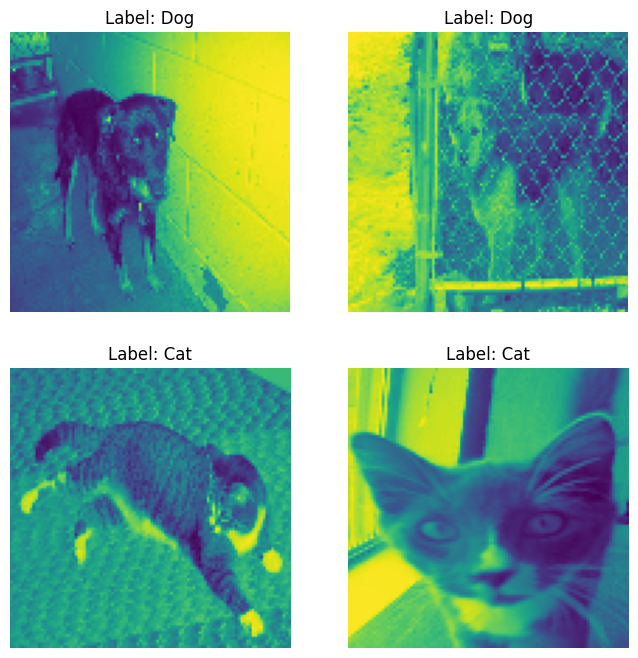

In [ ]:
display_random_images(images, labels, num_images=4)

In [ ]:
X = np.array(images).reshape(len(images), -1)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']


SVM with linear Kernel:

-------------------------------


Testing Metrics:

Accuracy: 0.5016666666666667
Precision: 0.5468384074941453
Recall: 0.4779938587512794
F1 Score: 0.5101037684325505




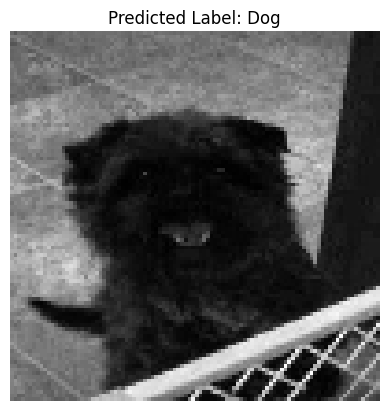

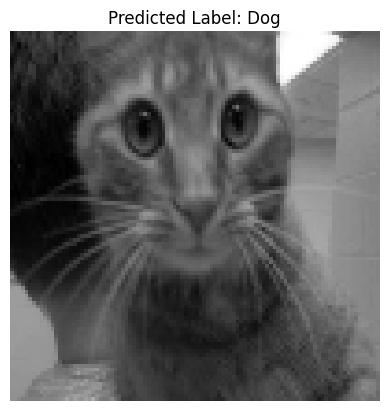


SVM with poly Kernel:

-------------------------------


Testing Metrics:

Accuracy: 0.5927777777777777
Precision: 0.6257731958762887
Recall: 0.6212896622313203
F1 Score: 0.6235233692860811




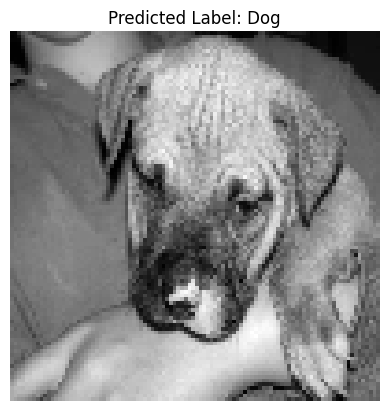

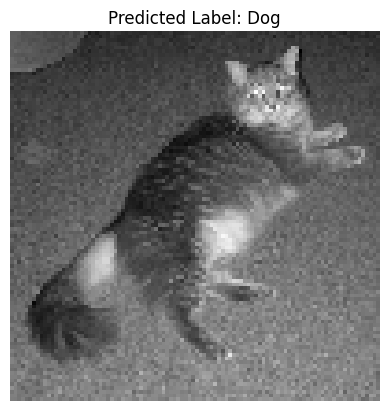


SVM with rbf Kernel:

-------------------------------


Testing Metrics:

Accuracy: 0.6522222222222223
Precision: 0.6506437768240343
Recall: 0.7758444216990789
F1 Score: 0.7077497665732961




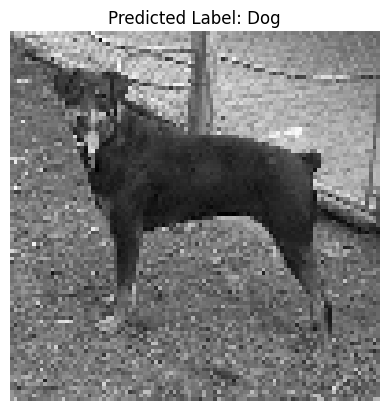

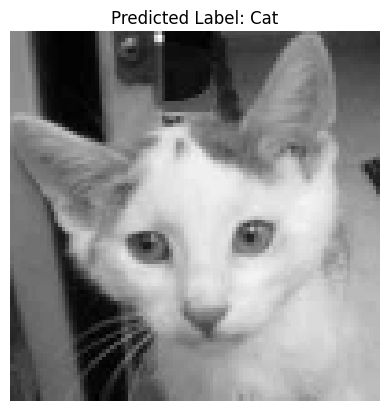


SVM with sigmoid Kernel:

-------------------------------


Testing Metrics:

Accuracy: 0.5277777777777778
Precision: 0.5624385447394297
Recall: 0.5854657113613101
F1 Score: 0.5737211634904714




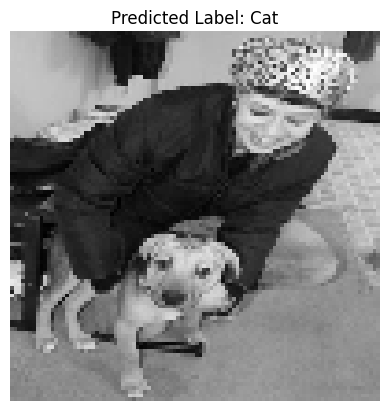

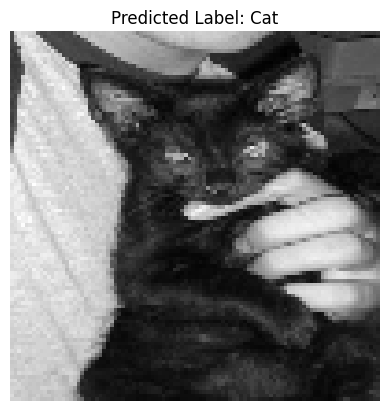

In [ ]:
for kernel in svm_kernels:

    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nSVM with {kernel} Kernel:")
    print("\n-------------------------------\n")

    print("\nTesting Metrics:\n")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

    dog_indices = np.where(y_test == 1)[0]
    random_dog_index = np.random.choice(dog_indices)
    dog_image = X_test[random_dog_index].reshape(100, 100)

    dog_label = "Dog" if y_pred[random_dog_index] == 1 else "Cat"
    plt.imshow(dog_image, cmap='gray' if len(dog_image.shape) == 2 else None)
    plt.title(f"Predicted Label: {dog_label}")
    plt.axis('off')
    plt.show()

    cat_indices = np.where(y_test == 0)[0]
    random_cat_index = np.random.choice(cat_indices)
    cat_image = X_test[random_cat_index].reshape(100, 100)

    cat_label = "Dog" if y_pred[random_cat_index] == 1 else "Cat"
    plt.imshow(cat_image, cmap='gray' if len(cat_image.shape) == 2 else None)
    plt.title(f"Predicted Label: {cat_label}")
    plt.axis('off')
    plt.show()

    submission_data = {'id': range(1, len(y_pred) + 1), 'label': y_pred}
    submission_df = pd.DataFrame(submission_data)

    submission_df.to_csv(f'svm_submission_{kernel}.csv', index=False)